In [23]:
import numpy as np

In [24]:
class LogisticRegression:
    def __init__(self, alpha=1e-3, iters=1000):
        self.alpha = alpha      # learning rate
        self.iters = iters      # number of iterations for gradient descent
        self.w = None           # weights (to be initialized later)
        self.b = None           # bias term (to be initialized later)

    def _sigmoid(self,z):
        return 1/ ( 1 + np.exp(-z))

    def _gradient(self,X,y,y_pred):
        err = y_pred - y

        dw = ( 1/ self.m) * np.dot(err,X)
        db = ( 1/ self.m) * np.sum(err)

        return dw,db

    def _update_param(self,dw,db):
        self.w -= self.alpha * dw
        self.b -= self.alpha * db

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return self._sigmoid(z)

    def fit(self,X,y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0

        for _ in range(self.iters):
            y_pred = self.predict(X)
            dw, db = self._gradient(X, y, y_pred)

            self._update_param(dw, db)
        
    def final_predict(self, X):
        
        return self.predict(X) 


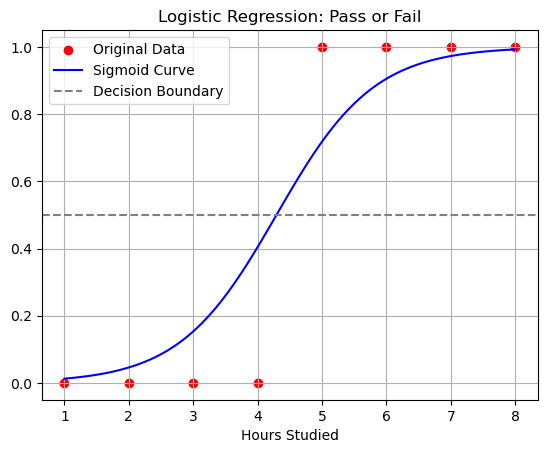

Prediction for 3.5 hours studied: [0.25957054]
Prediction for 6.5 hours studied: [0.94877281]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
#from logistic_regression import LogisticRegression 

# Sample Data
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Initialize logistic regression model
model = LogisticRegression(alpha=0.1, iters=1000)

# Fit the model
model.fit(X, y)

# Predict probabilities
X_test = np.linspace(1, 8, 100).reshape(-1, 1)
y_pred = model.predict(X_test)


# Plot the sigmoid curve
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X_test, y_pred, color='blue', label='Sigmoid Curve')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary')
plt.xlabel("Hours Studied")
plt.title("Logistic Regression: Pass or Fail")
plt.legend()
plt.grid(True)
plt.show()

# Optional: print predicted class for new values
print("Prediction for 3.5 hours studied:", model.predict(np.array([[3.5]])))
print("Prediction for 6.5 hours studied:", model.predict(np.array([[6.5]])))